# Logistic Regression

## Visualizing the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
data = np.loadtxt('data/ex2data1.txt', delimiter=',')
x = data[:, 0:2]
y = data[:, 2]

In [3]:
def plotData(x, y, xlabel, ylabel, posLabel, negLabel, pdProxy = None, pdLabel = None, axes = None):
    pos = y == 1
    neg = y == 0
    
    if axes == None:
        axes = plt.gca()
        
    posPts = axes.scatter(x[pos, 0], x[pos,1], c='black', marker='+')
    negPts = axes.scatter(x[neg, 0], x[neg,1], c='yellow', marker='o')    
    
    lgHandles = [posPts, negPts, pdProxy]
    lgLabels = [posLabel, negLabel, pdLabel]
    
    if pdProxy == None:
        lgHandles = lgHandles[0:2]
        lgLabels = lgLabels[0:2]
        
    axes.legend(lgHandles, lgLabels, loc=0, scatterpoints = 1)
    axes.xlabel = xlabel
    axes.ylabel = ylabel

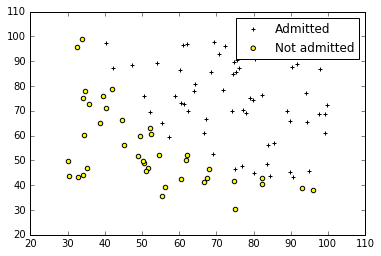

In [4]:
plotData(x, y, 'Test 1 score', 'Test 2 score', 'Admitted', 'Not admitted')

## Implementation

### Logistic regression:

\begin{align}
y_i|x_i, \theta \sim \operatorname{Bern}(h(x_i\theta))\\
h(x) = \frac{1}{1+e^{-x}}
\end{align}

#### Sigmoid function

\begin{equation}
h(x) = \frac{1}{1+e^{-x}}
\end{equation}

In [5]:
#sigmoid function
def sigm(x):
    return(1/(1+np.exp(-x)))

#### Cost function

\begin{equation}
J(\theta)=\frac{1}{m}\big((\log(X\theta))^T y+(\log(\boldsymbol{1}-h(X\theta)))^T(\boldsymbol{1}-y)\big)
\end{equation}

#### Gradient function

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}X^T\big(h(X\theta)-y\big)
\end{equation}

In [6]:
#cost function
def costFunction(theta, X, y):
    m = len(y)
    #patch for log0:
    hx = sigm(np.dot(X, theta)).clip(min = 0.0001, max = 0.9999)
    J = 1/m*(-np.dot(y, np.log(hx))-np.dot((1-y),np.log(1-hx)))
    return(J)

In [7]:
def gradient(theta, X, y):
    m = len(y)
    hx = sigm(np.dot(X, theta))
    grad = 1/m*np.dot(X.T, hx-y)
    return(grad.flatten())

In [8]:
m = len(y)
X = np.column_stack((np.ones(m), x))
p = X.shape[1]
initial_theta = np.zeros(p)

In [9]:
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)

In [10]:
print('Cost at initial theta (zerors):', cost)
print('Gradient at initial theta (zeros):', grad)


Cost at initial theta (zerors): 0.69314718056
Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221]


#### Learning parameters

In [11]:
res = minimize(costFunction, initial_theta, args=(X,y), jac=gradient, options={'maxiter':400})
res

      fun: 0.20350403436042627
 hess_inv: array([[  3.02919952e+03,  -2.46256615e+01,  -2.40804280e+01],
       [ -2.46256615e+01,   2.14884541e-01,   1.82859150e-01],
       [ -2.40804280e+01,   1.82859150e-01,   2.06127428e-01]])
      jac: array([ -4.75704463e-06,  -3.43208378e-04,  -3.08298743e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 73
      nit: 20
     njev: 61
   status: 2
  success: False
        x: array([-25.15971027,   0.20621771,   0.20145813])

#### Prediction and Evaluation

In [12]:
theta = res.x
#student with exam 1 score 45 and exam 2 score 85:
print('Admission probability:', sigm(np.dot([1, 45, 85], theta)))

Admission probability: 0.776264384119


#### Decision boundary

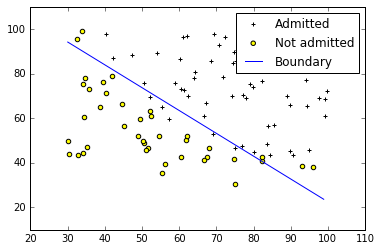

In [13]:
x1_min, x1_max = X[:,1].min(), X[:,2].max()
bd, = plt.plot([x1_min, x1_max], [(-theta[1]*x1_min-theta[0])/theta[2], (-theta[1]*x1_max-theta[0])/theta[2]], color = 'blue')
bd_line = mlines.Line2D([], [], color='blue')

plotData(x, y, 'Test 1 score', 'Test 2 score', 'Admitted', 'Not admitted', pdProxy = bd_line, pdLabel = "Boundary")

In [14]:
def predict(theta, X, thres = 0.5):
    return(sigm(X.dot(theta))>= thres).astype("int")

In [15]:
print('Accuracy:', sum(predict(theta, X)==y)/X.shape[0])

Accuracy: 0.89


# Regularized logistic regression

#### Visualizing the data

In [16]:
data2 = np.loadtxt('data/ex2data2.txt', delimiter=',')
x2 = data2[:, 0:2]
y2 = data2[:, 2]

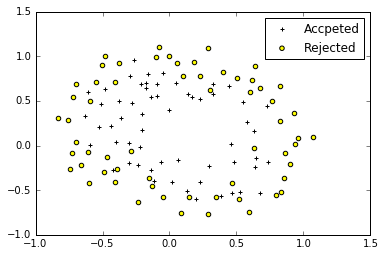

In [17]:
pos2 = y2 == 1
neg2 = y2 == 0
acp = plt.scatter(x2[pos2, 0], x2[pos2, 1], c = 'black', marker = '+')
rej = plt.scatter(x2[neg2, 0], x2[neg2, 1], c = 'yellow', marker = 'o')
plt.legend((acp, rej), ('Accpeted', 'Rejected'), scatterpoints=1, loc=0)

In [18]:
m2 = len(y2)
poly = PolynomialFeatures(6)
X2 = poly.fit_transform(x2)
p2 = X2.shape[1]

In [19]:
X2.shape

(118, 28)

#### Regularized Cost Function

\begin{equation}
J(\theta)=\frac{1}{m}\big((\log(X\theta))^T y+(\log(\boldsymbol{1}-h(X\theta)))^T(\boldsymbol{1}-y)\big)+\frac{\lambda}{2m}\theta^T\theta 
\end{equation}

#### Regularized gradient

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}X^T\big(h(X\theta)-y\big)+\frac{\lambda}{m}\theta
\end{equation}

In [20]:
#regularized cost function
def costFunctionReg(theta, X, y, lam):
    m = len(y)
    #patch for log0:
    hx = sigm(np.dot(X, theta)).clip(min = 0.0001, max = 0.9999)
    J = 1/m*(-np.dot(y, np.log(hx))-np.dot((1-y),np.log(1-hx)))+lam/2/m*theta.dot(theta)
    return(J)

In [21]:
def gradientReg(theta, X, y, lam):
    m = len(y)
    hx = sigm(np.dot(X, theta))
    grad = 1/m*np.dot(X.T, hx-y)+lam/m*theta
    return(grad.flatten())

In [22]:
initial_theta = np.zeros(p2)
costFunctionReg(initial_theta, X2, y2, 1)

0.69314718055994529

#### Decision boundary

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


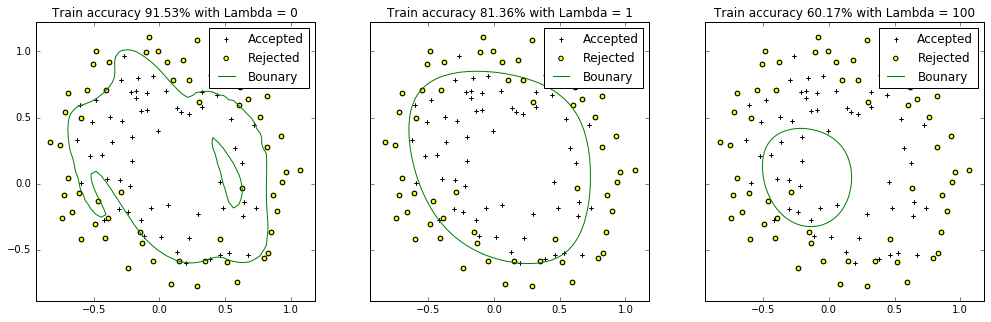

In [23]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

for i, thres in enumerate([0, 1, 100]):
    
    #Learn the parameters
    res2 = minimize(costFunctionReg, initial_theta, args=(X2, y2, thres), jac=gradientReg, options={'maxiter':3000})
    theta2 = res2.x
    
    #Accuracy
    accuracy=100*sum(predict(theta2, X2) == y2)/m2
    
    #Plot 
    x1Grid = np.linspace(x2[:,0].min(), x2[:,0].max())
    x2Grid = np.linspace(x2[:,1].min(), x2[:,1].max())
    
    xx1, xx2 = np.meshgrid(x1Grid, x2Grid)
    h = sigm(poly.fit_transform(np.column_stack((xx1.ravel(), xx2.ravel()))).dot(theta2))
    h = h.reshape(xx1.shape)
    
    acp = axes[i].scatter(x2[pos2, 0], x2[pos2, 1], c = 'black', marker = '+')
    rej = axes[i].scatter(x2[neg2, 0], x2[neg2, 1], c = 'yellow', marker = 'o')
    bd = axes[i].contour(xx1, xx2, h, [0.5], linewidths =1, colors='g')
    bd_line = mlines.Line2D([],[], color='g')
    
    plotData(x2, y2, 'Microchip Test 1', 'Microchip Test 2', 'Accepted', 'Rejected', 
             pdProxy = bd_line, pdLabel = "Bounary", axes = axes[i])
    axes[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), thres))